In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [ ]:
os.chdir('/content/drive/Othercomputers/내 MacBook Air/MLDL/project/open')

In [ ]:
os.listdir()

['sample_submission.csv', 'val.csv', 'train.csv', 'test.csv']

In [ ]:
train = pd.read_csv('./train.csv')
val = pd.read_csv('./val.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

## 데이터 EDA


In [ ]:
val.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [ ]:
eda = val.iloc[:, 1:]

In [ ]:
eda_col = eda.columns
eda_col = eda_col[:-1]
eda_col

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30'],
      dtype='object')

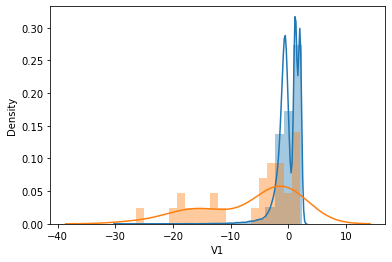

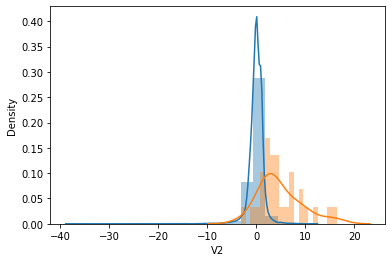

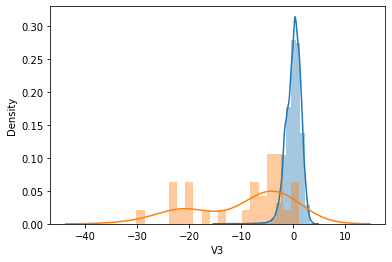

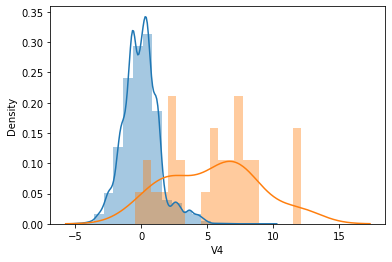

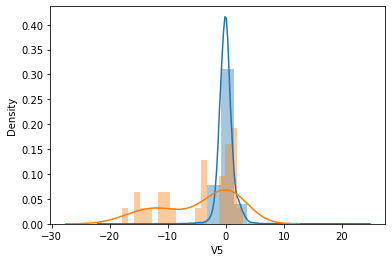

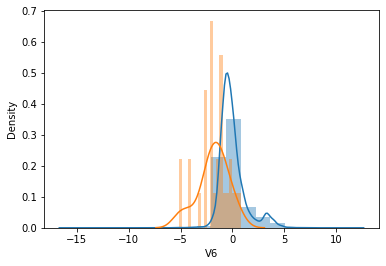

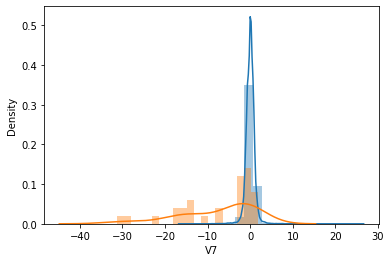

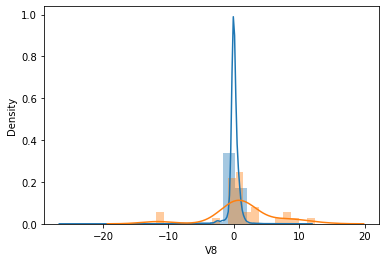

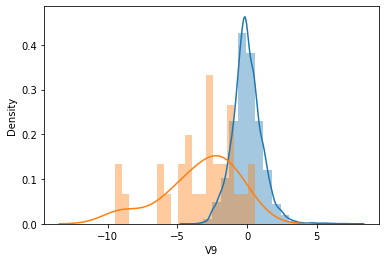

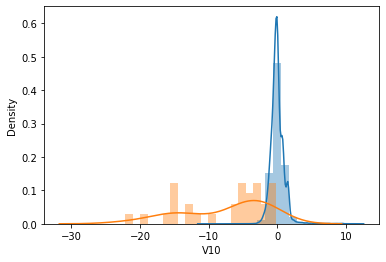

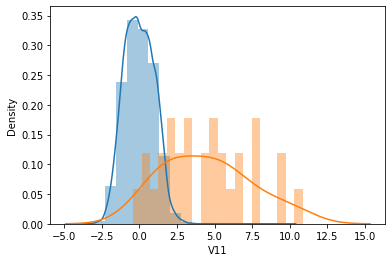

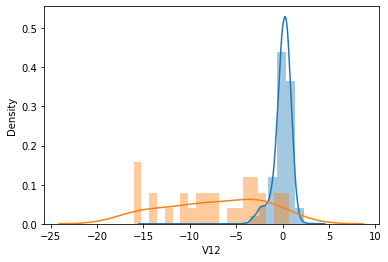

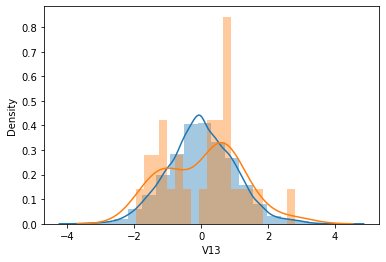

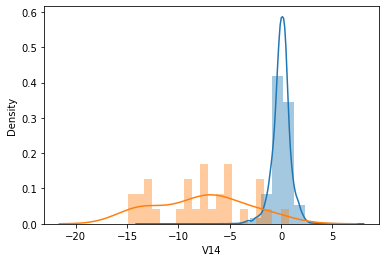

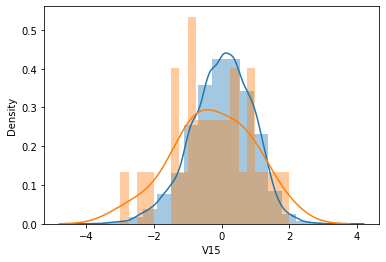

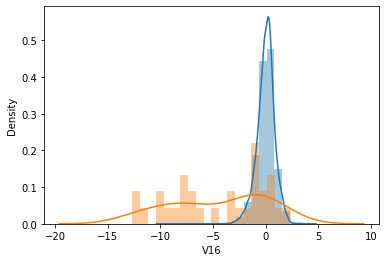

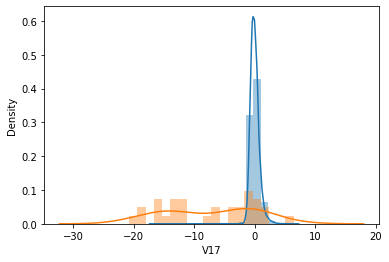

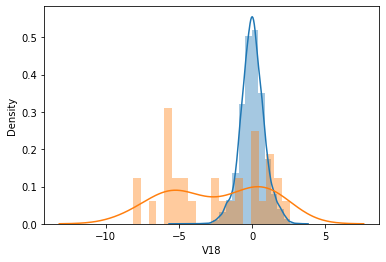

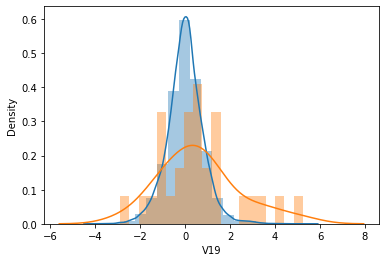

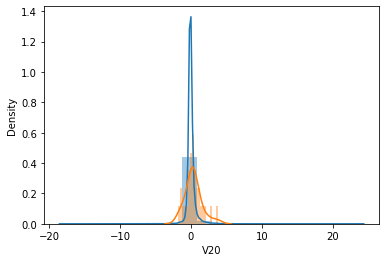

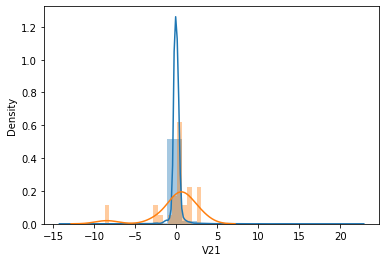

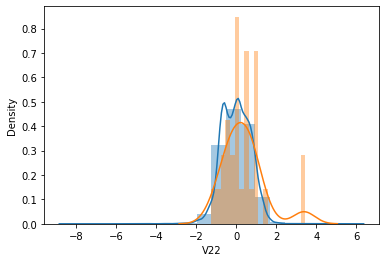

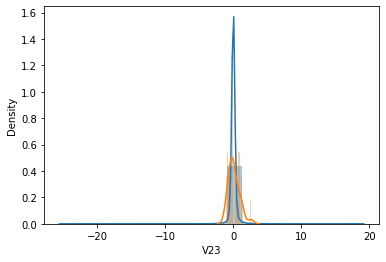

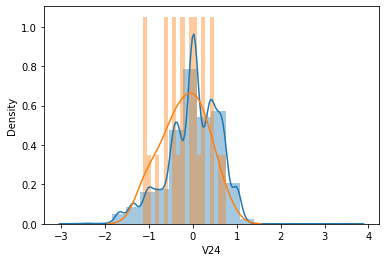

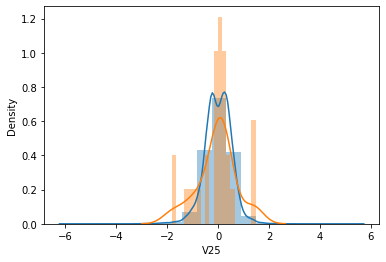

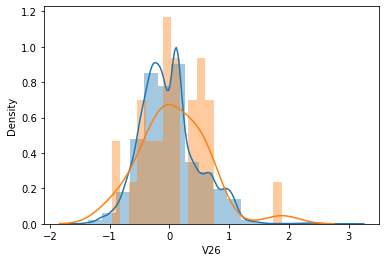

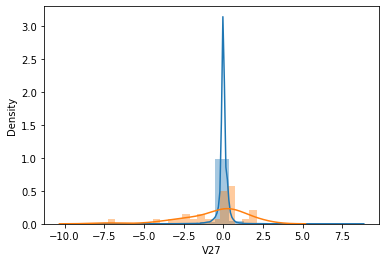

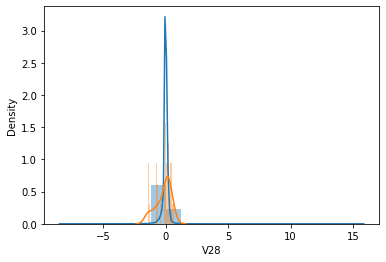

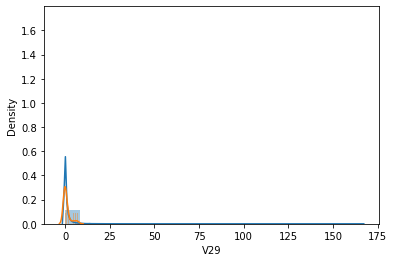

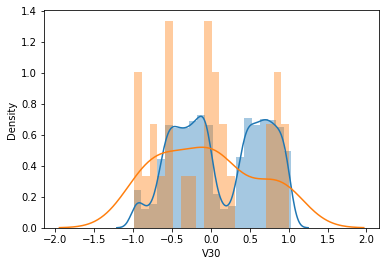

In [ ]:
for i in eda_col:
  sns.distplot(eda.loc[eda['Class']==0, i], bins=20, label='normal')
  sns.distplot(eda.loc[eda['Class']==1, i], bins=20, label='outlier')
  plt.show()

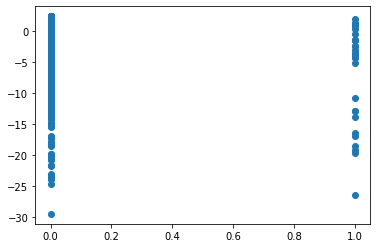

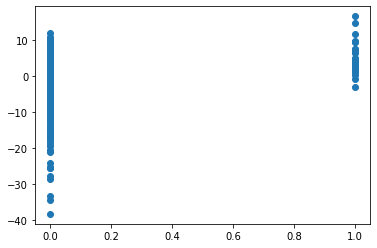

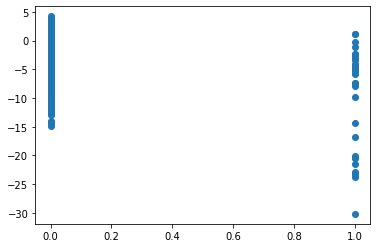

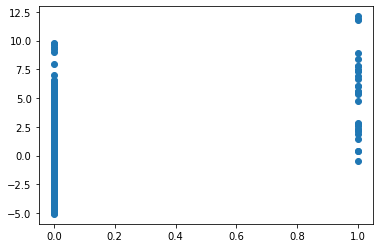

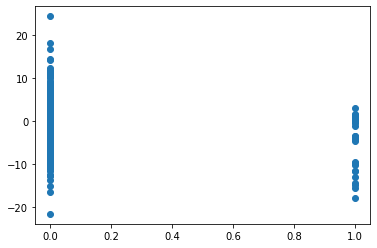

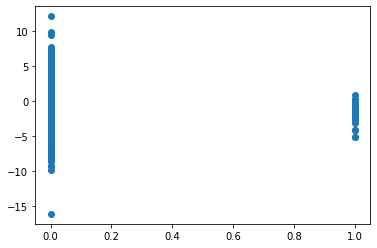

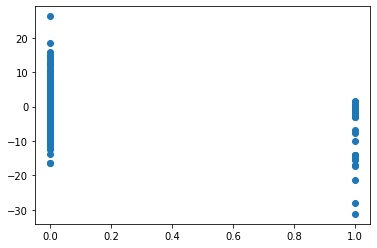

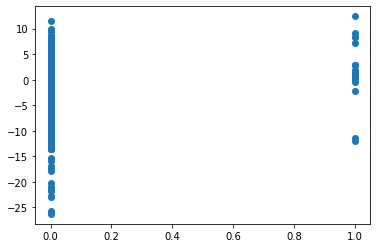

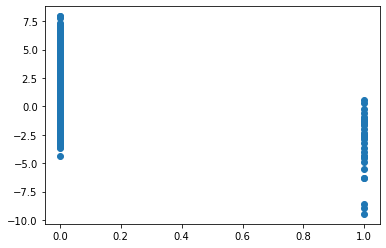

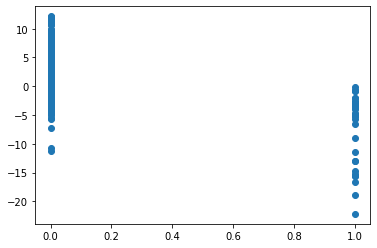

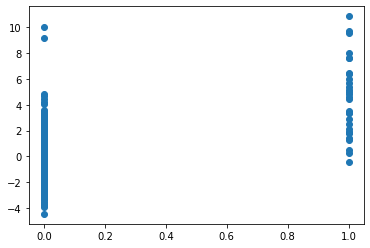

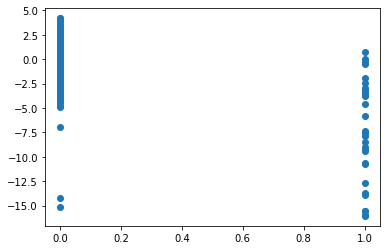

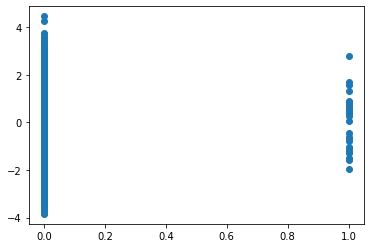

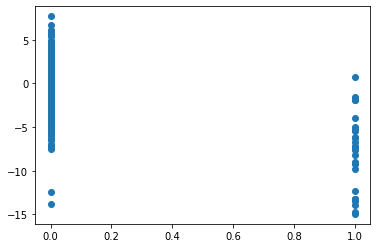

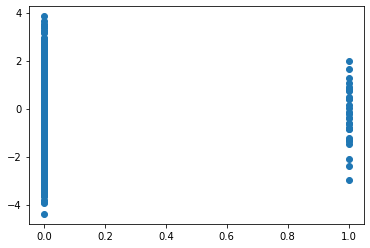

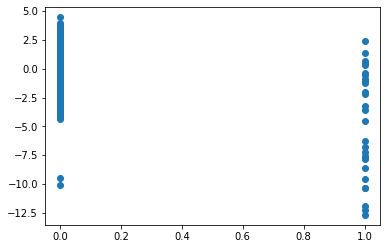

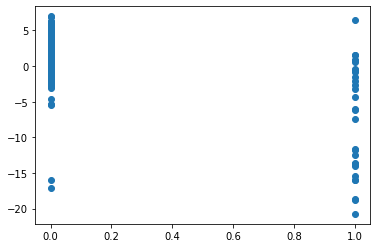

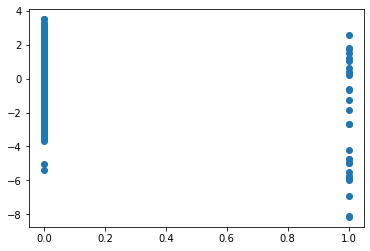

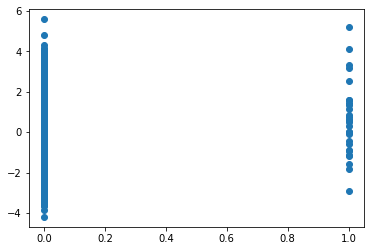

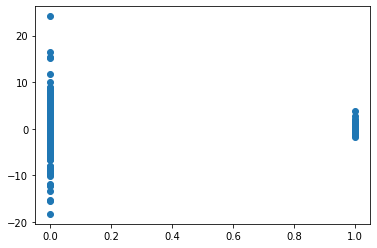

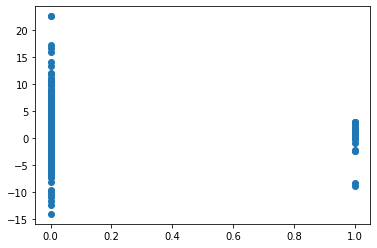

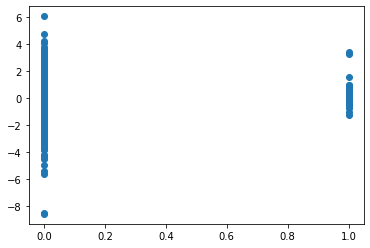

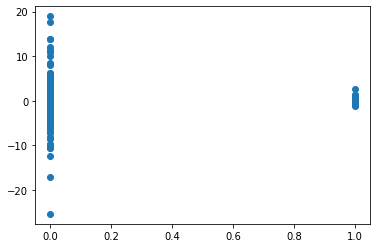

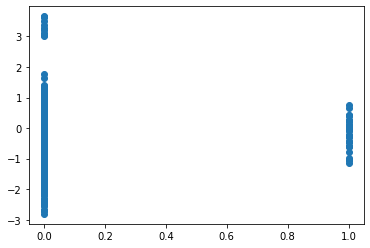

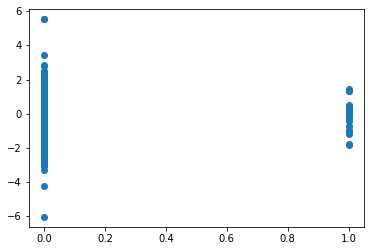

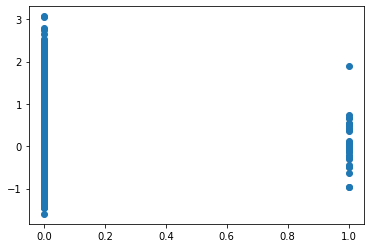

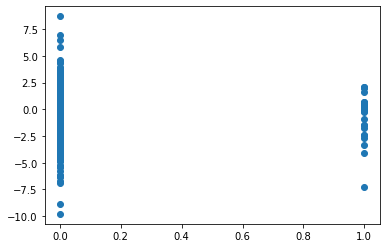

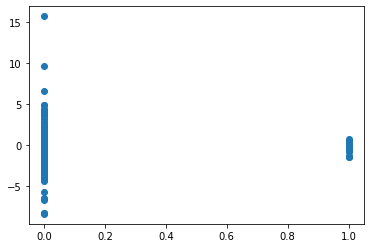

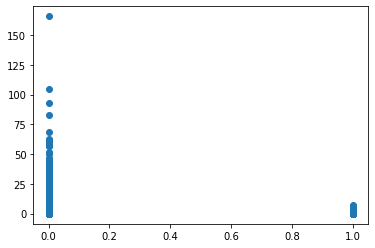

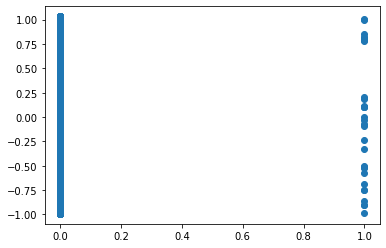

In [ ]:
for i in eda_col:
  plt.scatter(eda['Class'], eda_x[i])
  plt.show()

In [2]:
(1,2,3,4,5,7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 21, 27, 30)

TypeError: ignored

### 시각화 결과
1. 정상데이터는 대체적으로 대칭적

  비정상데이터는 비대칭적
2. V13, V15, V19-V29 분포 모습이 비슷, 즉 첨도가 정상데이터가 높을 뿐 분포 평균이 비슷하거나 분산이 비슷

3. 나머지 칼럼 분포 모습이 이질적, 평균/분산/왜도가 다름

=> 2번의 칼럼 제외 나머지 칼럼을 feature로 선정

#### 사기거래 비율

In [ ]:
eda['Class'].value_counts()

0    28432
1       30
Name: Class, dtype: int64

In [ ]:
 30/28462

0.0010540369615627855

In [ ]:
train.iloc[:, 1:].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


### feature 축소를 위한 pca 실시

In [ ]:
from sklearn.preprocessing import StandardScaler  # 표준화 
eda_x = eda.drop(['Class'], axis=1).values # 독립변인들의 value값만 추출
eda_y = eda['Class'].values # 종속변인 추출

In [ ]:
std = StandardScaler()
eda_x = std.fit_transform(eda_x) # 독립변인 표준화

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20) # 주성분 개수
printcipalComponents = pca.fit_transform(eda_x)
pca_valid = pd.DataFrame(data=printcipalComponents)
pca_valid.head(30)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3.212427,1.676812,-1.397003,1.490813,-0.265793,-0.578641,0.421949,1.977010,-1.314305,-0.381602,...,-1.744150,0.727039,-0.890509,-1.327997,1.004987,-0.289012,-1.142561,-0.794772,0.635868,1.776089
1,2.533041,0.140830,-0.398956,-0.909906,-0.148302,-0.788190,0.618776,0.409105,-1.956239,0.607198,...,-0.768190,0.115555,-0.132854,-0.226102,1.091840,-0.364957,1.995078,-0.155594,-0.728377,-0.295616
2,2.695888,-0.540593,-0.155924,-0.220070,0.251674,-0.654253,0.115796,0.162785,0.727919,0.718773,...,0.267161,-0.172575,0.205282,-0.371341,0.674283,0.171938,-0.195977,0.103807,0.076731,0.131757
3,1.944975,-0.242975,-1.381898,-1.737598,-0.417229,0.683952,1.431180,-0.008608,0.883783,-1.257453,...,-2.011484,0.149539,-2.015553,2.672811,1.279341,1.561516,0.037922,-1.922713,0.248657,2.070953
4,2.060582,-0.050390,0.280398,-0.721366,-0.095227,-0.196241,-0.297221,-0.275143,-0.216453,1.163153,...,0.510137,-0.950898,-0.104528,1.442683,-0.582080,0.861974,1.385526,0.414205,-0.031507,-0.664130
5,2.756717,-0.554988,0.075414,0.079905,0.525854,0.826290,0.408624,-0.734572,-1.814188,-1.015968,...,0.974542,-0.286260,-0.566035,-0.951009,-0.567975,1.000447,-0.562948,-0.055794,-0.378324,-0.237317
6,2.550376,-0.435159,0.077208,0.193137,-0.310340,-0.229109,0.614513,-0.065574,0.124883,-0.895271,...,-0.986136,0.400047,0.561133,-1.257454,0.083700,0.474456,1.234183,-0.371807,0.146945,-0.251712
7,2.454655,-0.467704,1.393185,-0.249322,-0.808110,-0.188719,1.144774,0.177176,-0.659163,-1.247251,...,0.181104,-0.747330,1.222500,2.512375,-0.318357,0.423763,-0.424692,-0.977753,0.017649,2.563830
8,2.577836,-0.499669,0.084600,-0.577833,0.051814,0.931006,1.413044,-2.472712,0.727745,-0.873295,...,-0.868982,-0.448859,-0.738417,0.914017,-0.106082,-1.213394,-1.354437,-0.312907,-0.039500,-0.199740
9,2.118577,-0.538482,0.090102,-1.170931,-0.021817,-0.716587,0.134348,-0.742729,0.725295,1.344286,...,-0.337032,-0.449656,0.208021,0.010010,0.903039,-0.137630,0.398847,0.069628,-0.133388,-0.037371


In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.08333542 0.06306333 0.03723422 0.03491754 0.03455495 0.03379422
 0.03376551 0.03352941 0.03322864 0.03289771 0.03279234 0.0327224
 0.03269219 0.03260385 0.03250611 0.03243826 0.03232737 0.03229696
 0.03221133 0.03217624 0.0320451  0.03201668 0.03188169 0.03161288
 0.03139776]
0.9040420989219556


#### 차원 축소 시, 주성분 개수는 적어도 20개 이상 필요
=> 주성분 분석으로 차원 축소를 해도 feature수는 많음
=> 어차피 feature 수가 많다면 딥러닝 오토인코더가 적절하다고 판단됨

## 오토인코더
1. 훈련/검증 데이터 전처리 -> 검증 데이터 독립/타켓으로 나누기
2. 오토인코더 신경망 설계

# 데이터 전처리

In [ ]:
val.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [ ]:
val_x = val.drop(['Class'], axis=1)
val_label = val.iloc[:, -1]

In [ ]:
train_x = train.iloc[:, 1:]

In [ ]:
test_x = test.iloc[:, 1:]

In [ ]:
col=val_x.columns[1:]